# DATA- 603 Final Project

# Emotion Recognition System Using Facial Expression 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [ ]:
import os
import pandas as pd

def count_classes(path, name):
    classes_dict = {class_name: len(os.listdir(os.path.join(path, class_name))) for class_name in os.listdir(path)}
    df = pd.DataFrame(classes_dict, index=[name]).transpose().sort_values(by=name, ascending=False)
    return df

train_dir ='/content/drive/MyDrive/data 603/train'
test_dir = '/content/drive/MyDrive/data 603/test'

train_count = count_classes(train_dir, 'Train')
test_count = count_classes(test_dir, 'Test')

print(train_count)
print(test_count)


          Train
happy      7245
neutral    4965
sad        4839
fear       4107
angry      3995
surprise   3199
disgust     436
          Test
happy     1774
sad       1247
neutral   1233
fear      1024
angry      958
surprise   831
disgust    111


We used google colab pro to run the project using T4 GPU. So we mounted the Dataset on Google Drive in a folder called data 603 which contains 2 sub folders one for training ('/content/drive/MyDrive/data 603/train') and the other for testing ('/content/drive/MyDrive/data 603/test').

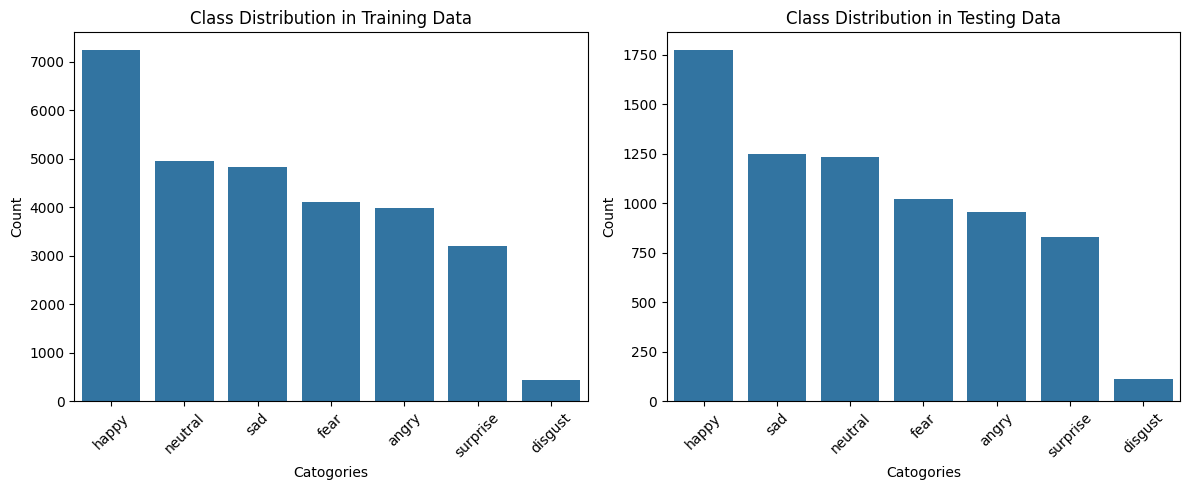

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up two subplots (one for training and one for testing)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting class distribution for the training dataset
sns.barplot(x=train_count.index, y='Train', data=train_count, ax=axes[0])
axes[0].set_title('Class Distribution in Training Data')
axes[0].set_ylabel('Count')

# Plotting class distribution for the testing dataset
sns.barplot(x=test_count.index, y='Test', data=test_count, ax=axes[1])
axes[1].set_title('Class Distribution in Testing Data')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Catogories')
axes[0].set_xlabel('Catogories')
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**The distribution of classes in a dataset, separated into "Training Data" and "Testing Data," is shown in the above two bar charts. Every bar graph displays the number of occurrences for the various classes, each of which is associated with one of the following emotions: "happy," "neutral," "sad," "fear," "angry," "surprise," and "disgust."**

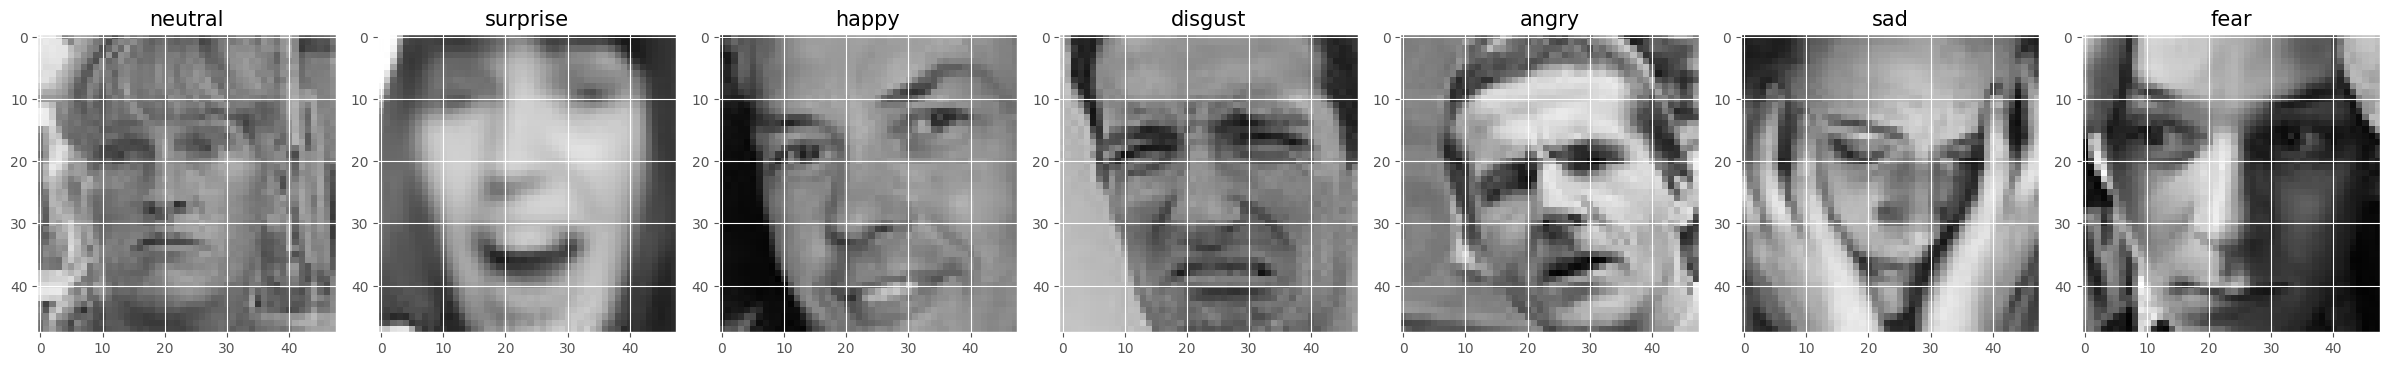

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Setting up the style and size of the plot
plt.style.use('ggplot')
plt.figure(figsize=(24, 10))

# Counter for the number of images displayed
num_images_displayed = 0

# Path to the directory containing image folders
IMAGE_DIR = '/content/drive/MyDrive/data 603/train'

# Creating a list of directory names, excluding hidden files or directories
dir_names = [dir for dir in os.listdir(IMAGE_DIR) if not dir.startswith('.')]

# Initializing an iterator for the directory list
dir_iterator = iter(dir_names)
while num_images_displayed < 7:
    try:
        # Getting the next directory
        current_dir = next(dir_iterator)
    except StopIteration:
        break  # Break the loop if there are no more directories

    # Path to the first image in the current directory
    first_image_path = os.path.join(IMAGE_DIR, current_dir, os.listdir(os.path.join(IMAGE_DIR, current_dir))[0])

    # Loading and displaying the image
    image = cv2.imread(first_image_path)
    plt.subplot(1, 7, num_images_displayed + 1)
    plt.imshow(image)
    plt.title(current_dir, fontsize=15)

    # Incrementing the image counter
    num_images_displayed += 1
plt.tight_layout()
plt.show()


**Visualizing an image from each subfolder from the parent directory ('/content/drive/MyDrive/data 603/train') using OpenCV.**

## Apache Spark for Image Enhancement

In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=64df8b7fccae25416e2dade062ab8f4c048f430aabf3e65dc2f2c12acc8c6ed7
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.sql.types import ArrayType, FloatType
from pyspark.sql.functions import udf
import cv2
import numpy as np

In [ ]:
from pyspark.sql import SparkSession

# Initializing Spark session
spark = SparkSession.builder.appName("ImageCount").getOrCreate()

def load_images(folder_path):
    return spark.read.format("binaryFile").load(folder_path)

# Paths to train subfolders
train_folders = [
    "/content/drive/MyDrive/data 603/train/angry",
    "/content/drive/MyDrive/data 603/train/disgust",
    "/content/drive/MyDrive/data 603/train/fear",
    "/content/drive/MyDrive/data 603/train/happy",
    "/content/drive/MyDrive/data 603/train/neutral",
    "/content/drive/MyDrive/data 603/train/sad",
    "/content/drive/MyDrive/data 603/train/surprise"
]

# Paths to test subfolders
test_folders = [
    "/content/drive/MyDrive/data 603/test/angry",
    "/content/drive/MyDrive/data 603/test/disgust",
    "/content/drive/MyDrive/data 603/test/fear",
    "/content/drive/MyDrive/data 603/test/happy",
    "/content/drive/MyDrive/data 603/test/neutral",
    "/content/drive/MyDrive/data 603/test/sad",
    "/content/drive/MyDrive/data 603/test/surprise"
]

# Loading datasets for each category in training
train_dfs = [load_images(folder_path) for folder_path in train_folders]

# Counting the number of images in each training subfolder
num_train_images = [train_df.count() for train_df in train_dfs]

# Calculating total number of images in the training folder
total_train_images = sum(num_train_images)

# Displaying the counts for training
for i, folder_path in enumerate(train_folders):
    print(f"Number of images in {folder_path}: {num_train_images[i]}")

print(f"Total number of images in training folder: {total_train_images}")

# Loading datasets for each subfolder in testing
test_dfs = [load_images(folder_path) for folder_path in test_folders]

# Counting the number of images in each testing subfolder
num_test_images = [test_df.count() for test_df in test_dfs]

# Calculating total number of images in the testing folder
total_test_images = sum(num_test_images)

# Displaying the counts for testing
for i, folder_path in enumerate(test_folders):
    print(f"Number of images in {folder_path}: {num_test_images[i]}")

print(f"Total number of images in testing folder: {total_test_images}")

# Stop the Spark session
spark.stop()


Number of images in /content/drive/MyDrive/data 603/train/angry: 3995
Number of images in /content/drive/MyDrive/data 603/train/disgust: 436
Number of images in /content/drive/MyDrive/data 603/train/fear: 4107
Number of images in /content/drive/MyDrive/data 603/train/happy: 7245
Number of images in /content/drive/MyDrive/data 603/train/neutral: 4965
Number of images in /content/drive/MyDrive/data 603/train/sad: 4839
Number of images in /content/drive/MyDrive/data 603/train/surprise: 3199
Total number of images in training folder: 28786
Number of images in /content/drive/MyDrive/data 603/test/angry: 958
Number of images in /content/drive/MyDrive/data 603/test/disgust: 111
Number of images in /content/drive/MyDrive/data 603/test/fear: 1024
Number of images in /content/drive/MyDrive/data 603/test/happy: 1774
Number of images in /content/drive/MyDrive/data 603/test/neutral: 1233
Number of images in /content/drive/MyDrive/data 603/test/sad: 1247
Number of images in /content/drive/MyDrive/da

Large collections of images can be processed in a distributed manner thanks to our utilization of the PySpark module within Apache Spark. Using the session name "ImageCount," we initiate the Spark session, and the load_images function efficiently reads image files from specified locations using Spark's "binaryFile" format. To facilitate parallel data processing, separate Spark DataFrames are created for each emotion category within both the training and testing datasets. The script employs Spark's distributed computing capabilities to count the number of photos within each subfolder, providing insights into the distribution of the dataset. It calculates the total number of photos within the training and testing sets and displays the results, offering an overview of image counts in each subfolder. To ensure efficient resource management, the Spark session is then terminated. This approach enhances the efficiency and scalability of image dataset processing, particularly beneficial for handling large datasets in distributed computing environments.

In [ ]:
import os
import numpy as np
import cv2
from pyspark.sql import SparkSession

def initialize_spark():
    return SparkSession.builder \
        .appName("ImageEnhancementWithSpark") \
        .getOrCreate()

def enhanced_save_image(input_path, output_path):
    facial_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if facial_image is not None:
        min_val = np.percentile(facial_image, 5)
        max_val = np.percentile(facial_image, 95)
        updated_enhanced_image = np.clip((facial_image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
        cv2.imwrite(output_path, updated_enhanced_image)

def process_emotion_folder(emotion, input_folder, output_folder, spark):
    input_emotion_path = os.path.join(input_folder, emotion)
    output_emotion_path = os.path.join(output_folder, emotion)

    if os.path.isdir(input_emotion_path):
        # Creating corresponding output folder all emotions
        os.makedirs(output_emotion_path, exist_ok=True)

        # Processing the all images in input folder
        image_paths = [os.path.join(input_emotion_path, filename) for filename in os.listdir(input_emotion_path) if filename.endswith('.jpg')]

        for input_image_path in image_paths:
            # Constructing  the respective  output image path, which has same structure as input image folder
            output_image_path = os.path.join(output_emotion_path, os.path.basename(input_image_path))

            # Enhancing is done and saved the images in the respective output folder
            enhanced_save_image(input_image_path, output_image_path)
        num_enhanced_images = len(image_paths)
        print(f"Enhanced {num_enhanced_images} images for emotion: {emotion}")

        # Indicating that enhancement is completed in each folder
        print(f"Image enhancement has been completed for the emotion: {emotion}. Enhanced {num_enhanced_images} images.")

def main():
    spark = initialize_spark()

    input_parent_directory = "/content/drive/MyDrive/data 603/train"
    output_parent_directory = "/content/drive/MyDrive/data 603/ENHANCED_TRAIN"

    os.makedirs(output_parent_directory, exist_ok=True)

    for emotion in os.listdir(input_parent_directory):
        process_emotion_folder(emotion, input_parent_directory, output_parent_directory, spark)

    print("Image enhancement has been completed on all folders.")
    spark.stop()

if __name__ == "__main__":
    main()


<ipython-input-8-707d3bf9abfe>:16: RuntimeWarning: invalid value encountered in divide
  updated_enhanced_image = np.clip((facial_image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
<ipython-input-8-707d3bf9abfe>:16: RuntimeWarning: invalid value encountered in cast
  updated_enhanced_image = np.clip((facial_image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)


Enhanced 4965 images for emotion: neutral
Image enhancement has been completed for the emotion: neutral. Enhanced 4965 images.
Enhanced 3199 images for emotion: surprise
Image enhancement has been completed for the emotion: surprise. Enhanced 3199 images.
Enhanced 7245 images for emotion: happy
Image enhancement has been completed for the emotion: happy. Enhanced 7245 images.
Enhanced 436 images for emotion: disgust
Image enhancement has been completed for the emotion: disgust. Enhanced 436 images.
Enhanced 3995 images for emotion: angry
Image enhancement has been completed for the emotion: angry. Enhanced 3995 images.
Enhanced 4839 images for emotion: sad
Image enhancement has been completed for the emotion: sad. Enhanced 4839 images.
Enhanced 4107 images for emotion: fear
Image enhancement has been completed for the emotion: fear. Enhanced 4107 images.
Image enhancement has been completed on all folders.


- The  above code utilizes Apache Spark for distributed computing to enhance facial images in a dataset.
- It initializes a Spark session named "ImageEnhancementWithSpark" using the initialize_spark function.
- The core enhancement function, enhanced_save_image, reads grayscale facial images from an input path, adjusts pixel values to enhance contrast, and saves the enhanced image to a specified output path.
- Enhancement is achieved by computing percentiles of pixel values and scaling them to the full intensity range.
- A function, process_emotion_folder, is defined to process all images in a specified emotion folder, applying the enhancement function to each image.
- The main function iterates through each emotion folder in the training dataset, processes and enhances the images, and stores the enhanced images in a new directory.
- The code preserves the existing folder hierarchy while organizing the improved photos into a new directory structure.
- With Spark, parallel processing is enabled, improving the effectiveness of picture improvement jobs for several emotion categories simultaneously.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def init_datagen():
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

def save_augmented_images(input_path, output_path, datagen, num_augmented=5):
    try:
        img = tf.keras.preprocessing.image.load_img(input_path, target_size=(48, 48))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Create a flow iterator which saves images to 'output_path'
        augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=output_path, save_prefix='aug', save_format='jpg')

        # Generate 'num_augmented' augmented images
        for _ in range(num_augmented):
            augmented_images.next()
    except Exception as e:
        print(f"Error processing image {input_path}: {e}")

def processing_emotions_all_folder(emotion, input_folder, output_folder, datagen, num_augmented=5):
    input_emotion_path = os.path.join(input_folder, emotion)
    output_emotion_path = os.path.join(output_folder, emotion)

    if os.path.isdir(input_emotion_path):
        os.makedirs(output_emotion_path, exist_ok=True)

        image_files = [os.path.join(input_emotion_path, filename) for filename in os.listdir(input_emotion_path) if os.path.splitext(filename)[1].lower() == '.jpg']

        for input_image_path in image_files:
            save_augmented_images(input_image_path, output_emotion_path, datagen, num_augmented)

        print(f"Data augmentation complete for emotion: {emotion}. Processed {len(image_files)} original images. Augmented images: {num_augmented * len(image_files)}")
    else:
        print(f"Input directory does not exist: {input_emotion_path}")

def main():
    input_parent_directory = "/content/drive/MyDrive/data 603/ENHANCED_TRAIN"
    output_parent_directory = "/content/drive/MyDrive/data 603/AUGMENTATED_TRAIN"

    os.makedirs(output_parent_directory, exist_ok=True)

    datagen = init_datagen()

    for emotion in os.listdir(input_parent_directory):
        processing_emotions_all_folder(emotion, input_parent_directory, output_parent_directory, datagen)

    print("Data augmentation has been completed on all folders.")

if __name__ == "__main__":
    main()


Data augmentation complete for emotion: neutral. Processed 4965 original images. Augmented images: 24825
Data augmentation complete for emotion: surprise. Processed 3199 original images. Augmented images: 15995
Data augmentation complete for emotion: happy. Processed 7245 original images. Augmented images: 36225
Data augmentation complete for emotion: disgust. Processed 436 original images. Augmented images: 2180
Data augmentation complete for emotion: angry. Processed 3995 original images. Augmented images: 19975
Data augmentation complete for emotion: sad. Processed 4839 original images. Augmented images: 24195
Data augmentation complete for emotion: fear. Processed 4107 original images. Augmented images: 20535
Data augmentation has been completed on all folders.


## CNN (Convolutional Neural Networks)

In [ ]:
# Load the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import os
import tensorflow as tf
import keras
import cv2

# Load libraries for data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load libraries for building CNN
from tensorflow.keras.layers import *
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, Model

# Load libraries for ResNet transfer learning
from tensorflow.keras.applications import ResNet50V2

# Load libraries for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def custom_facial_CNN_Model(input_shape=(48, 48, 3)):
    model = Sequential()

    # CNN1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # CNN2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))

    return model


We defined a convolutional neural network (CNN) model for facial expression recognition using TensorFlow's Keras APIand batch normalization.

In [ ]:
# Define input and output directories
input_parent_directory = "/content/drive/MyDrive/data 603/AUGMENTATED_TRAIN"
output_directory = "/content/drive/MyDrive/data 603/model_output/final_model"

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define constants
input_shape = (48, 48, 3)
num_classes = len(os.listdir(input_parent_directory))

# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data generator for training set
train_generator = train_datagen.flow_from_directory(
    input_parent_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=128,
    class_mode='categorical'
)


Found 55365 images belonging to 7 classes.


Training model for 100 epochs

In [ ]:
# Creating and compiling the model
model = custom_facial_CNN_Model(input_shape=(input_shape[0], input_shape[1], 3))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
try:
    history = model.fit(train_generator, epochs=100)
except Exception as e:
    print(f"Error during training: {e}")

# Saving the trained model with .h5 extension
model.save(os.path.join(output_directory, 'trained_facial_expression_model.h5'))

# Saving the training history if available
if history is not None:
    history_path = os.path.join(output_directory, 'training_history.npy')
    np.save(history_path, history.history)
    print(f"Training history saved to {history_path}")

Epoch 1/100
433/433 [==============================] - 271s 607ms/step - loss: 2.0465 - accuracy: 0.1913
Epoch 2/100
433/433 [==============================] - 161s 371ms/step - loss: 1.8617 - accuracy: 0.2228
Epoch 3/100
433/433 [==============================] - 160s 370ms/step - loss: 1.8017 - accuracy: 0.2621
Epoch 4/100
433/433 [==============================] - 159s 368ms/step - loss: 1.7522 - accuracy: 0.2897
Epoch 5/100
433/433 [==============================] - 162s 375ms/step - loss: 1.6998 - accuracy: 0.3228
Epoch 6/100
433/433 [==============================] - 161s 373ms/step - loss: 1.6623 - accuracy: 0.3427
Epoch 7/100
433/433 [==============================] - 161s 371ms/step - loss: 1.6300 - accuracy: 0.3563
Epoch 8/100
433/433 [==============================] - 163s 376ms/step - loss: 1.5987 - accuracy: 0.3748
Epoch 9/100
433/433 [==============================] - 164s 379ms/step - loss: 1.5708 - accuracy: 0.3886
Epoch 10/100
433/433 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np

# Loading the training history
history_path = "/content/drive/MyDrive/data 603/model_output/final_model/training_history.npy"
history = np.load(history_path, allow_pickle=True).item()

# Printing the training accuracy
training_accuracy = history['accuracy']
final_training_accuracy = training_accuracy[-1] * 100
print(f"Final Training Accuracy for custom_facial_CNN_Model: {final_training_accuracy:.2f}%")


Final Training Accuracy for custom_facial_CNN_Model: 62.01%


The accuracy attained by the customized convolutional neural network (CNN) model on the training dataset after finishing the designated number of training epochs is indicated by the reported final training accuracy of 62.01%. In this case, it indicates that the model successfully classified about 62.01% of the training samples after being trained on the supplied augmented facial expression dataset. How successfully the model has mastered the task of matching input images to the appropriate facial expression classes throughout training is shown by the training accuracy.

<ipython-input-4-4cb5ec8e83de>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


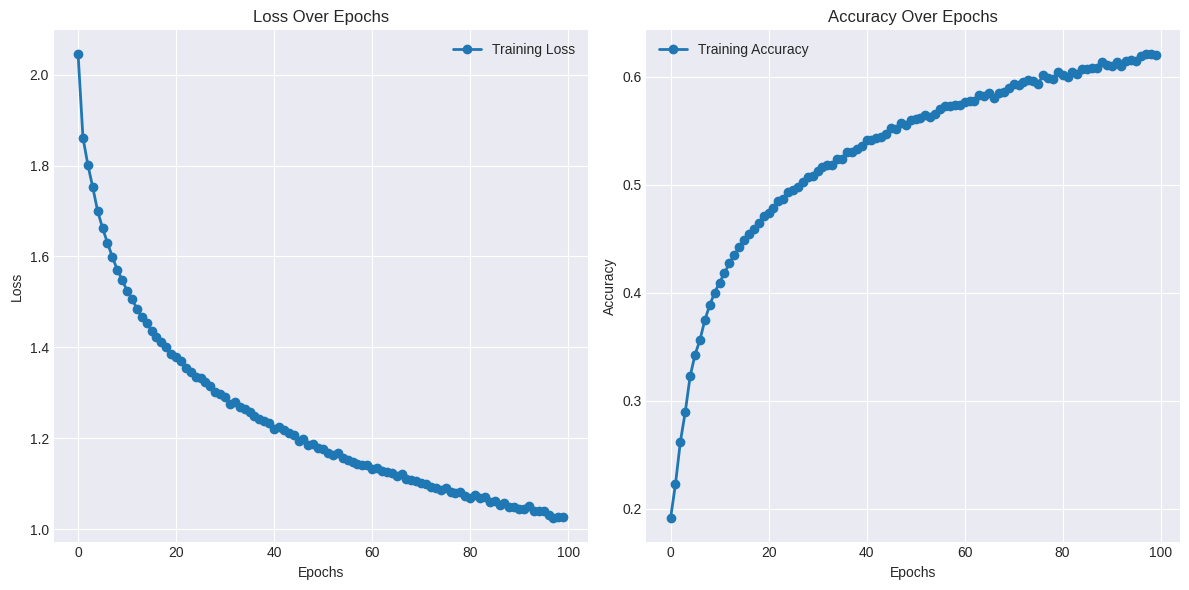

In [ ]:
import matplotlib.pyplot as plt

def plot_curves(history, loss_key='loss', val_loss_key='val_loss', accuracy_key='accuracy', val_accuracy_key='val_accuracy'):
    # Extracting data from history dictionary
    loss = history[loss_key]

    # Checking if validation keys are present
    val_loss = history.get(val_loss_key, None)
    accuracy = history[accuracy_key]
    val_accuracy = history.get(val_accuracy_key, None)

    epochs = range(len(loss))
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(12, 6))

    # Ploting loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training Loss", linewidth=2, marker='o')

    if val_loss is not None:
        plt.plot(epochs, val_loss, label="Validation Loss", linewidth=2, marker='o')

    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Training Accuracy", linewidth=2, marker='o')

    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2, marker='o')

    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()

# Calling the function
plot_curves(history)
plt.show()


"Loss Over Epochs" is the title of the first graph, which shows the training loss—a gauge of the model's effectiveness in lowering mistakes throughout training.
The training accuracy, or the proportion of accurate predictions the model made, is displayed in the second graph, "Accuracy Over Epochs." With each epoch, the accuracy grows gradually from a relatively low starting point, indicating that the model is getting better at properly identifying the training data. 

## Testing against Test Dataset

In [5]:
# Data generator for test set (without augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
input_shape = (48, 48, 3)
test_parent_directory = "/content/drive/MyDrive/data 603/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_parent_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=128,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [6]:
from tensorflow.keras.models import load_model

# Loading the saved model
saved_model_path = "/content/drive/MyDrive/data 603/model_output/final_model/trained_facial_expression_model.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


57/57 [==============================] - 2835s 51s/step - loss: 1.4071 - accuracy: 0.5071
Test Accuracy: 50.71%


There were 57 * 126 = 7178 test samples in total from the 57 batches (each containing 126 photos) that were used to evaluate the model. The given values for accuracy and loss are 50.71% and 1.4071, respectively. This accuracy shows the percentage of correctly categorized test samples, meaning that in roughly 50.71% of the test set, the model recognized facial expressions correctly.

In [8]:
history_path = "/content/drive/MyDrive/data 603/model_output/final_model/training_history.npy"
history = np.load(history_path, allow_pickle=True).item()

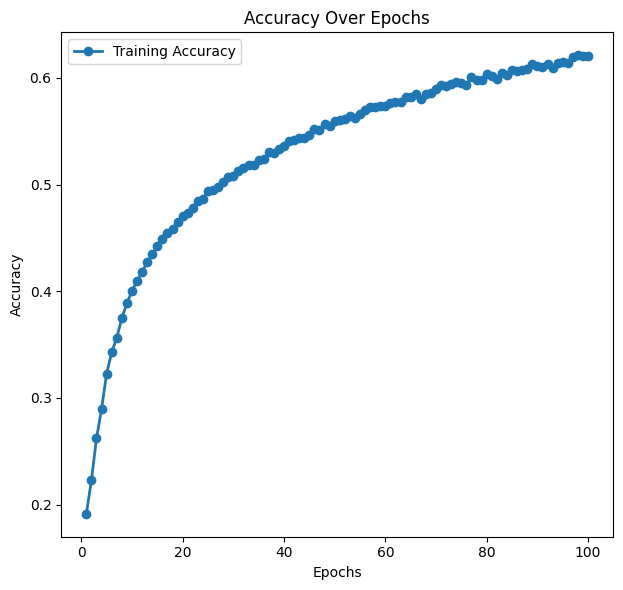

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(history, loss_key='loss', val_loss_key='val_loss', accuracy_key='accuracy', val_accuracy_key='val_accuracy', test_accuracy_key='test_accuracy'):
    # Extracting data from history dictionary
    loss = history[loss_key]
    val_loss = history.get(val_loss_key, None)
    accuracy = history[accuracy_key]
    val_accuracy = history.get(val_accuracy_key, None)
    test_accuracy = history.get(test_accuracy_key, None)

    epochs = range(1, len(loss) + 1)  # Start epochs from 1

    plt.figure(figsize=(12, 6))
    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Training Accuracy", linewidth=2, marker='o')

    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2, marker='o')

    if test_accuracy is not None:
        plt.plot(epochs, [test_accuracy] * len(epochs), label="Testing Accuracy", linewidth=2, marker='o')

    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
plot_learning_curve(history)
plt.show()


57/57 [==============================] - 16s 273ms/step


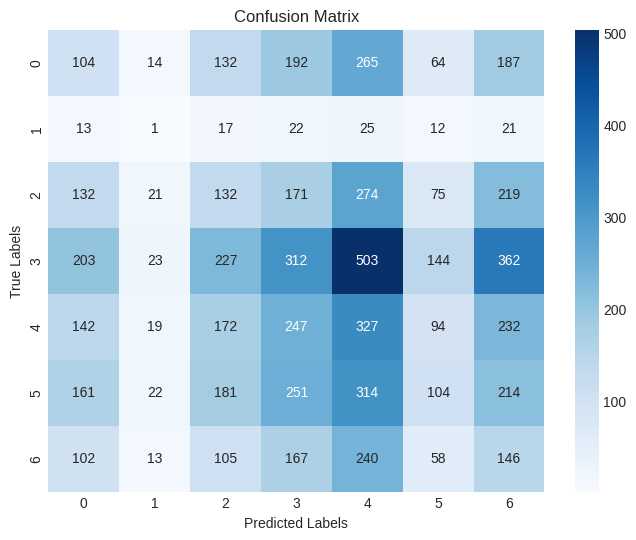

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating predictions on the test set
predictions = loaded_model.predict(test_generator)

# Converting predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

#  Extracting true class labels from the test generator
true_classes = test_generator.classes

# Generating confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels='auto', yticklabels='auto')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


57/57 [==============================] - 15s 264ms/step


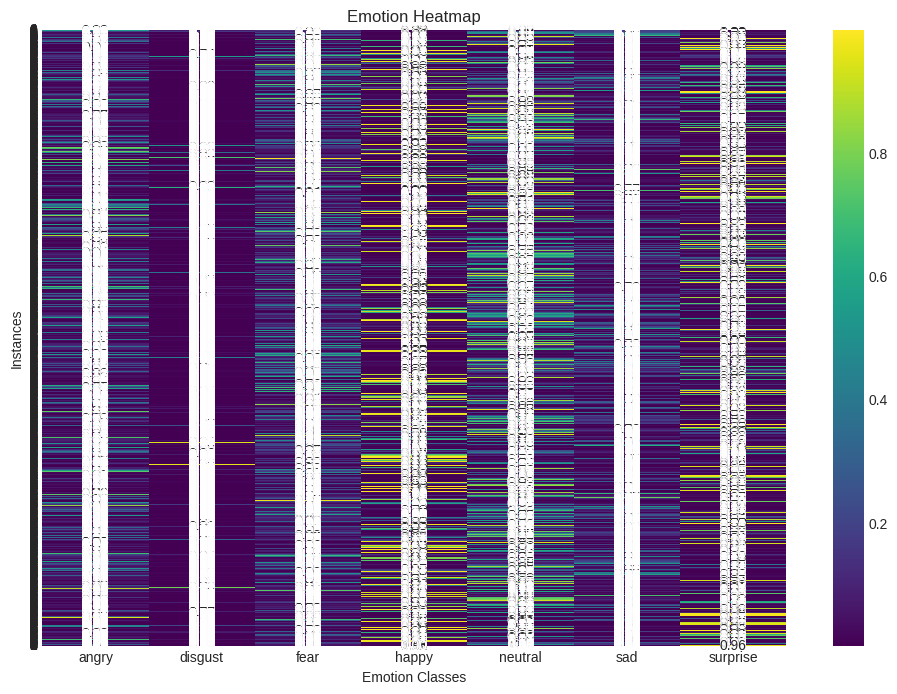

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generating predictions on the test set
predictions = loaded_model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(predictions, cmap='viridis', annot=True, fmt='.2f', xticklabels=test_generator.class_indices.keys(), yticklabels=predicted_classes)
plt.title('Emotion Heatmap')
plt.xlabel('Emotion Classes')
plt.ylabel('Instances')
plt.show()


The heatmap visualization above represents seven emotion categories: anger, disgust, fear, happiness, neutrality, sadness, and surprise. Each horizontal line in the heatmap corresponds to an incident, with colors indicating the degree or probability of each emotion. Brighter colors, such as yellow, indicate higher likelihoods, while darker hues, like purple, suggest lesser likelihoods. The discrete color blocks imply that the data is categorized or discrete rather than continuous. This type of visualization is useful for analyzing the effectiveness of an emotion detection algorithm and quickly assessing the distribution of emotional classifications in a dataset. Additionally, it helps identify which emotions are confidently recognized and which ones may be less distinct or more frequently confused with others.

In [18]:
import pandas as pd
predictions = loaded_model.predict(test_generator)

# Converting predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extracting true class labels from the test generator
true_classes = test_generator.classes

# Getting the filenames from the test generator
filenames = test_generator.filenames

# Creating a DataFrame with predictions
df_predictions = pd.DataFrame({
    'Filename': filenames,
    'True_Label': true_classes,
    'Predicted_Class': predicted_classes,
    'Probabilities': list(predictions)
})

# Displaying the DataFrame
print(df_predictions.head())

57/57 [==============================] - 15s 267ms/step
                         Filename  True_Label  Predicted_Class  \
0  angry/PrivateTest_10131363.jpg           0                5   
1  angry/PrivateTest_10304478.jpg           0                3   
2   angry/PrivateTest_1054527.jpg           0                5   
3  angry/PrivateTest_10590091.jpg           0                4   
4   angry/PrivateTest_1109992.jpg           0                4   

                                       Probabilities  
0  [0.052562572, 0.0063620685, 0.10189209, 0.2595...  
1  [0.07312536, 0.0008604961, 0.02666691, 0.81791...  
2  [0.020598209, 0.00067900616, 0.37806788, 0.000...  
3  [0.022305949, 0.009862377, 0.017062189, 0.4560...  
4  [0.08026613, 0.00064345717, 0.050592255, 0.265...  


We've made predictions on a test set of photos using a pre-trained facial expression recognition algorithm. The predictions are arranged into a Pandas DataFrame and show the model's confidence in matching each image to a particular face emotion.

In [19]:
# Initializing lists to store predictions
all_filenames = []
all_true_labels = []
all_predicted_labels = []
all_probabilities = []

# Generating predictions on the entire test set
for batch in test_generator:
    images, true_labels = batch
    filenames = test_generator.filenames[test_generator.batch_index - 1 : test_generator.batch_index - 1 + test_generator.batch_size]

    # Generating predictions for the current batch
    predictions = loaded_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Appending results to lists
    all_filenames.extend(filenames)
    all_true_labels.extend(true_labels.argmax(axis=1))
    all_predicted_labels.extend(predicted_labels)
    all_probabilities.extend(predictions)

    # Breaking the loop when all batches have been processed
    if test_generator.batch_index == test_generator.n // test_generator.batch_size:
        break

# Creating a DataFrame with predictions
df_predictions = pd.DataFrame({
    'Filename': all_filenames,
    'True_Label': all_true_labels,
    'Predicted_Class': all_predicted_labels,
    'Probabilities': all_probabilities
})

# Saving the DataFrame to a CSV file
csv_path = "/content/drive/MyDrive/data 603/model_output/predictions.csv"
df_predictions.to_csv(csv_path, index=False)
print(df_predictions.head())

4/4 [==============================] - 0s 3ms/step
                         Filename  True_Label  Predicted_Class  \
0  angry/PrivateTest_10131363.jpg           6                5   
1  angry/PrivateTest_10304478.jpg           5                0   
2   angry/PrivateTest_1054527.jpg           3                3   
3  angry/PrivateTest_10590091.jpg           4                6   
4   angry/PrivateTest_1109992.jpg           2                0   

                                       Probabilities  
0  [0.08025591, 0.004857197, 0.11635997, 0.138122...  
1  [0.4496579, 0.0015741655, 0.18695265, 0.002118...  
2  [0.0012835141, 0.0005201627, 0.0010017543, 0.9...  
3  [0.006265421, 0.000119622295, 0.061894864, 0.0...  
4  [0.3704495, 0.01794567, 0.3397561, 0.004544863...  


# Uploading Predictions to Mongodb

In [20]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.5 MB/s eta 0:00:00


In [21]:
import pymongo
import pandas as pd
import json

In [41]:
client=pymongo.MongoClient("mongodb://localhost:27017")

In [23]:
df=pd.read_csv("/content/drive/MyDrive/data 603/model_output/predictions.csv")

In [24]:
df.head()

,Filename,True_Label,Predicted_Class,Probabilities
0,angry/PrivateTest_10131363.jpg,6,5,[0.08025591 0.0048572 0.11635997 0.13812284 0...
1,angry/PrivateTest_10304478.jpg,5,0,[0.4496579 0.00157417 0.18695265 0.00211882 0...
2,angry/PrivateTest_1054527.jpg,3,3,[1.2835141e-03 5.2016269e-04 1.0017543e-03 9.9...
3,angry/PrivateTest_10590091.jpg,4,6,[6.26542093e-03 1.19622295e-04 6.18948638e-02 ...
4,angry/PrivateTest_1109992.jpg,2,0,[0.3704495 0.01794567 0.3397561 0.00454486 0...


In [25]:
data=df.to_dict(orient="records")

In [26]:
data

[{'Filename': 'angry/PrivateTest_10131363.jpg',
  'True_Label': 6,
  'Predicted_Class': 5,
  'Probabilities': '[0.08025591 0.0048572  0.11635997 0.13812284 0.10464095 0.5304945\n 0.02526872]'},
 {'Filename': 'angry/PrivateTest_10304478.jpg',
  'True_Label': 5,
  'Predicted_Class': 0,
  'Probabilities': '[0.4496579  0.00157417 0.18695265 0.00211882 0.17171629 0.1689719\n 0.01900833]'},
 {'Filename': 'angry/PrivateTest_1054527.jpg',
  'True_Label': 3,
  'Predicted_Class': 3,
  'Probabilities': '[1.2835141e-03 5.2016269e-04 1.0017543e-03 9.9073154e-01 5.0523281e-03\n 9.1779110e-04 4.9289549e-04]'},
 {'Filename': 'angry/PrivateTest_10590091.jpg',
  'True_Label': 4,
  'Predicted_Class': 6,
  'Probabilities': '[6.26542093e-03 1.19622295e-04 6.18948638e-02 2.45872280e-03\n 2.61234552e-01 2.76912991e-02 6.40335500e-01]'},
 {'Filename': 'angry/PrivateTest_1109992.jpg',
  'True_Label': 2,
  'Predicted_Class': 0,
  'Probabilities': '[0.3704495  0.01794567 0.3397561  0.00454486 0.07426421 0.157344

In [42]:
db=client["Facial_Emotion_Model_Predictions"]

In [43]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Facial_Emotion_Model_Predictions')


In [45]:
db.Images_Predictions.insert_many(data)

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 6631ce8874f2b65aeca686df, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

The Server Timeout Error occured because we were not able to make google colab access the port 27017 to connect with MongoDB.
So we downloaded the predictions.CSV file and Run the code on a local machine instead of colab and inserted the Data into MongoDB for future analysis.
We used pymongo library to interact with a MongoDB database. It establishes a connection to the MongoDB server running on localhost at port 27017. The code then reads a CSV file named "predictions.csv" into a Pandas DataFrame (df). The DataFrame is converted to a list of dictionaries (data) using the to_dict method with the "records" orientation. Subsequently, a MongoDB database named "Facial_Emotion_Model_Predictions" is accessed, and the data from the DataFrame is inserted into a collection named "Images_Predictions" using the insert_many method. This process facilitates the storage of the predictions from the CSV file into a MongoDB collection for further retrieval and analysis within the specified database.

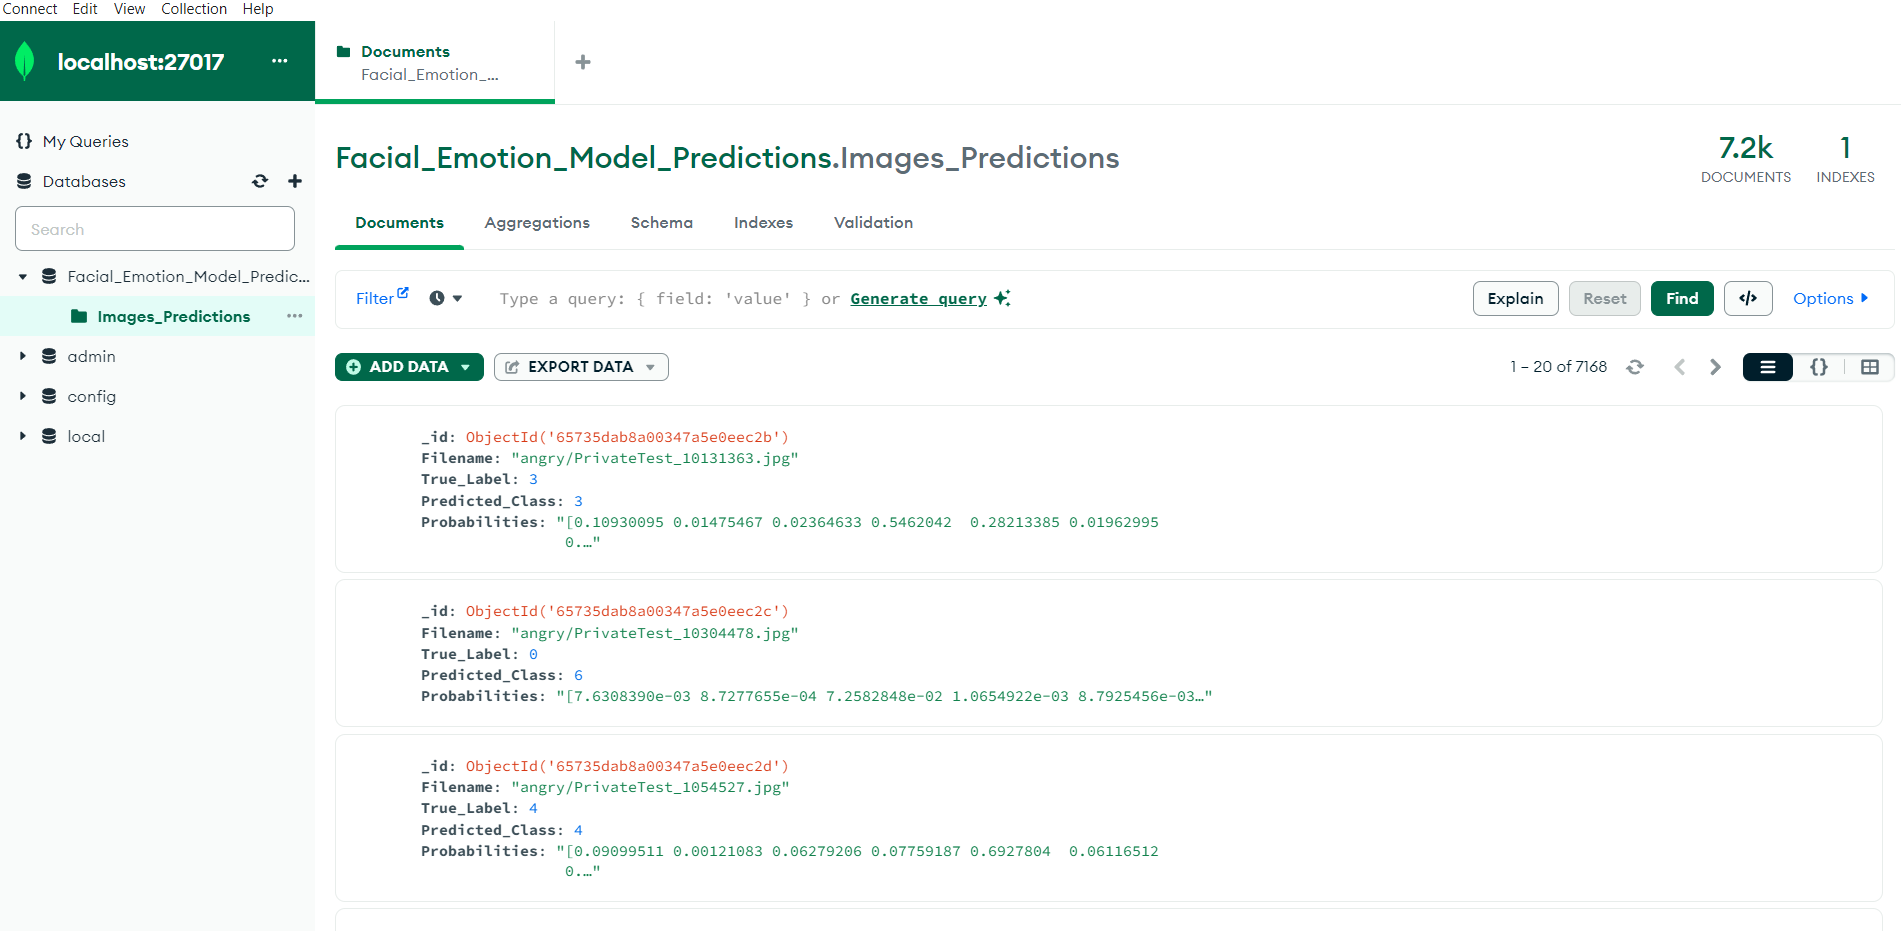

## Emotion Recognition System Using Facial Expression

Using the weights of training data we created an application that can recognize a persons emotion by his facial expression and even maps his expression to a corresponding emoji. 

# **Project Summary**

The project commences by structuring facial emotion images within a directory, followed by employing OpenCV for enhancing image quality. Subsequently, data augmentation techniques are applied to increase dataset diversity. A custom Convolutional Neural Network (CNN) model is formulated utilizing TensorFlow and Keras, trained on an extensive dataset containing both original and augmented images. The model's effectiveness is assessed on a distinct test set, and outcomes, including accuracy metrics, are recorded. The trained model"trained_facial_expression_model.h5" was stored locally to make a facial expression detection app using TKinter python library and tensorflow OpenCV. The trained model is then employed for predictions on novel images, and the results, alongside pertinent details, are stored within a MongoDB collection for streamlined data organization. MongoDB queries can be executed to retrieve specific prediction subsets, facilitating in-depth analysis of the model's performance across various emotion categories. This project showcases a comprehensive pipeline encompassing image preprocessing, CNN model training, result analysis,Deploying the model in realtime and structured storage within a MongoDB database, illustrating a holistic approach to image processing, machine learning, and data management.